## 1. Perkenalan


In [283]:
'''
    =================================================
    Graded Challange 4

    Nama  : Maria Melisa Gunawan
    Batch : RMT-29

    Program ini dibuat guna mengevaluasi konsep Regression dan mampu memahami konsep regression dengan Linear Regression
    ,mampu mempersiapkan data untuk digunakan dalam model Linear Regression, dan mampu mengimplementasikan Linear Regression untuk membuat prediksi.
    =================================================
    '''

'\n    =================================================\n    Graded Challange 4\n\n    Nama  : Maria Melisa Gunawan\n    Batch : RMT-29\n\n    Program ini dibuat guna mengevaluasi konsep Regression dan mampu memahami konsep regression dengan Linear Regression\n    ,mampu mempersiapkan data untuk digunakan dalam model Linear Regression, dan mampu mengimplementasikan Linear Regression untuk membuat prediksi.\n    =================================================\n    '

## 2. Import Libraries

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score




## 3. Data Loading

Load Dataset

In [285]:
df = pd.read_csv("rideshare.csv")

Tampilkan info dataset

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Tampilkan beberapa baris pertama dataset


In [287]:
df.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## 4. Exploratory Data Analysis (EDA)

#### Statistik Deskriptif

In [288]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


#### Visualisasi

Visualisasi distribusi variabel numerik

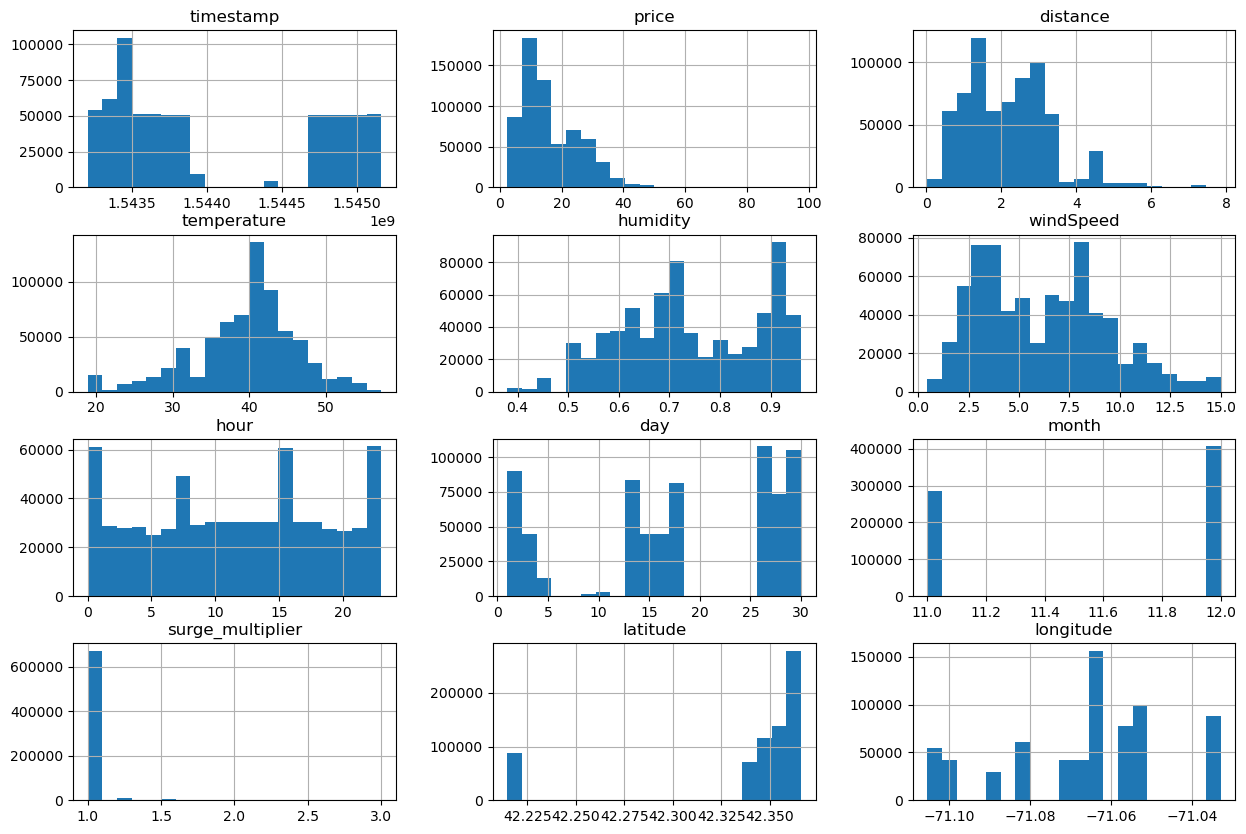

In [289]:
# Histogram untuk variabel numerik
numeric_cols = ['timestamp','price',  'distance', 'temperature', 'humidity', 'windSpeed', 'hour','day','month','surge_multiplier','latitude','longitude']
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.show()




-Penumpang banyak menaiki rideshare di sekitar timestamp tertinggi di sekitar 1.5430 dan jarang penumpang yang menaiki di timestamp terendah di sekitar 1.5444

-Price tertinggi yang dibayarkan penumpang di sekitar 10 dolar dan terendah di sekitar 50 dolar yang berarti banyak penumpang yang membayar sekitar 9 dolar dan jarang penumpang yang membayar hingga 50 dolar

-Distance tertinggi yang ditempuh di sekitar 1 km dan terendah di sekitar 7 km

-Penumpang banyak menaiki rideshare pada saat temperatur sedang tinggi dan mencapai tertinggi di sekitar 42 derajat dan jarang mendapatkan penumpang pada saat suhu sedang sangat rendah di sekitar 2 derajat dan saat suhu sangat panas di sekitar 56 derajat

-Penumpang banyak menaiki rideshare pada saat humidity(kelembapan) mencapai 0.9 dan jarang ada penumpang saat humidity mencapai di sekitar 0.48

-Penumpang banyak menaiki rideshare pada saat windspeed mencapai 3 dan 8 dan jarang penumpang pada saat windspeed mencapai sekitar 0.8 dan 15 keatas

-Jam penumpang tertinggi di sekitar jam 0 dan 22 dan terendah di sekitar jam 5

-Penumpang baanyak menaiki rideshare pada tanggal tertinggi di sekitar tanggal 26 dan jarang ada penumpang di sekitar tanggal 6-12 dan 19-25

-Bulan dengan paling banyak penumpang adalah bulan 12 dan terendah di 11.2-11.8(awal november hingga akhir november)

-Dengan surge multiplier yang cenderung hanya berada di angka 1 menandakan bahwa layanan rideshare dalam kasus ini cenderung stabil 
secara harga, dengan tarif yang relatif konsisten dan jarang mengalami peningkatan yang signifikan bahkan dalam situasi permintaan tinggi

-Titik tertinggi pada latitude (42.350) menandakan area dengan permintaan tinggi pada rideshare dan permintaan yang rendah di sekitar  42.250-42.325

-Dengan longtitude tertinggi di sekitar -71.07 menandakat wilayah ini yang sangat berpotensi bagi layanan rideshare.

Visualisasi distribusi variabel kategorikal

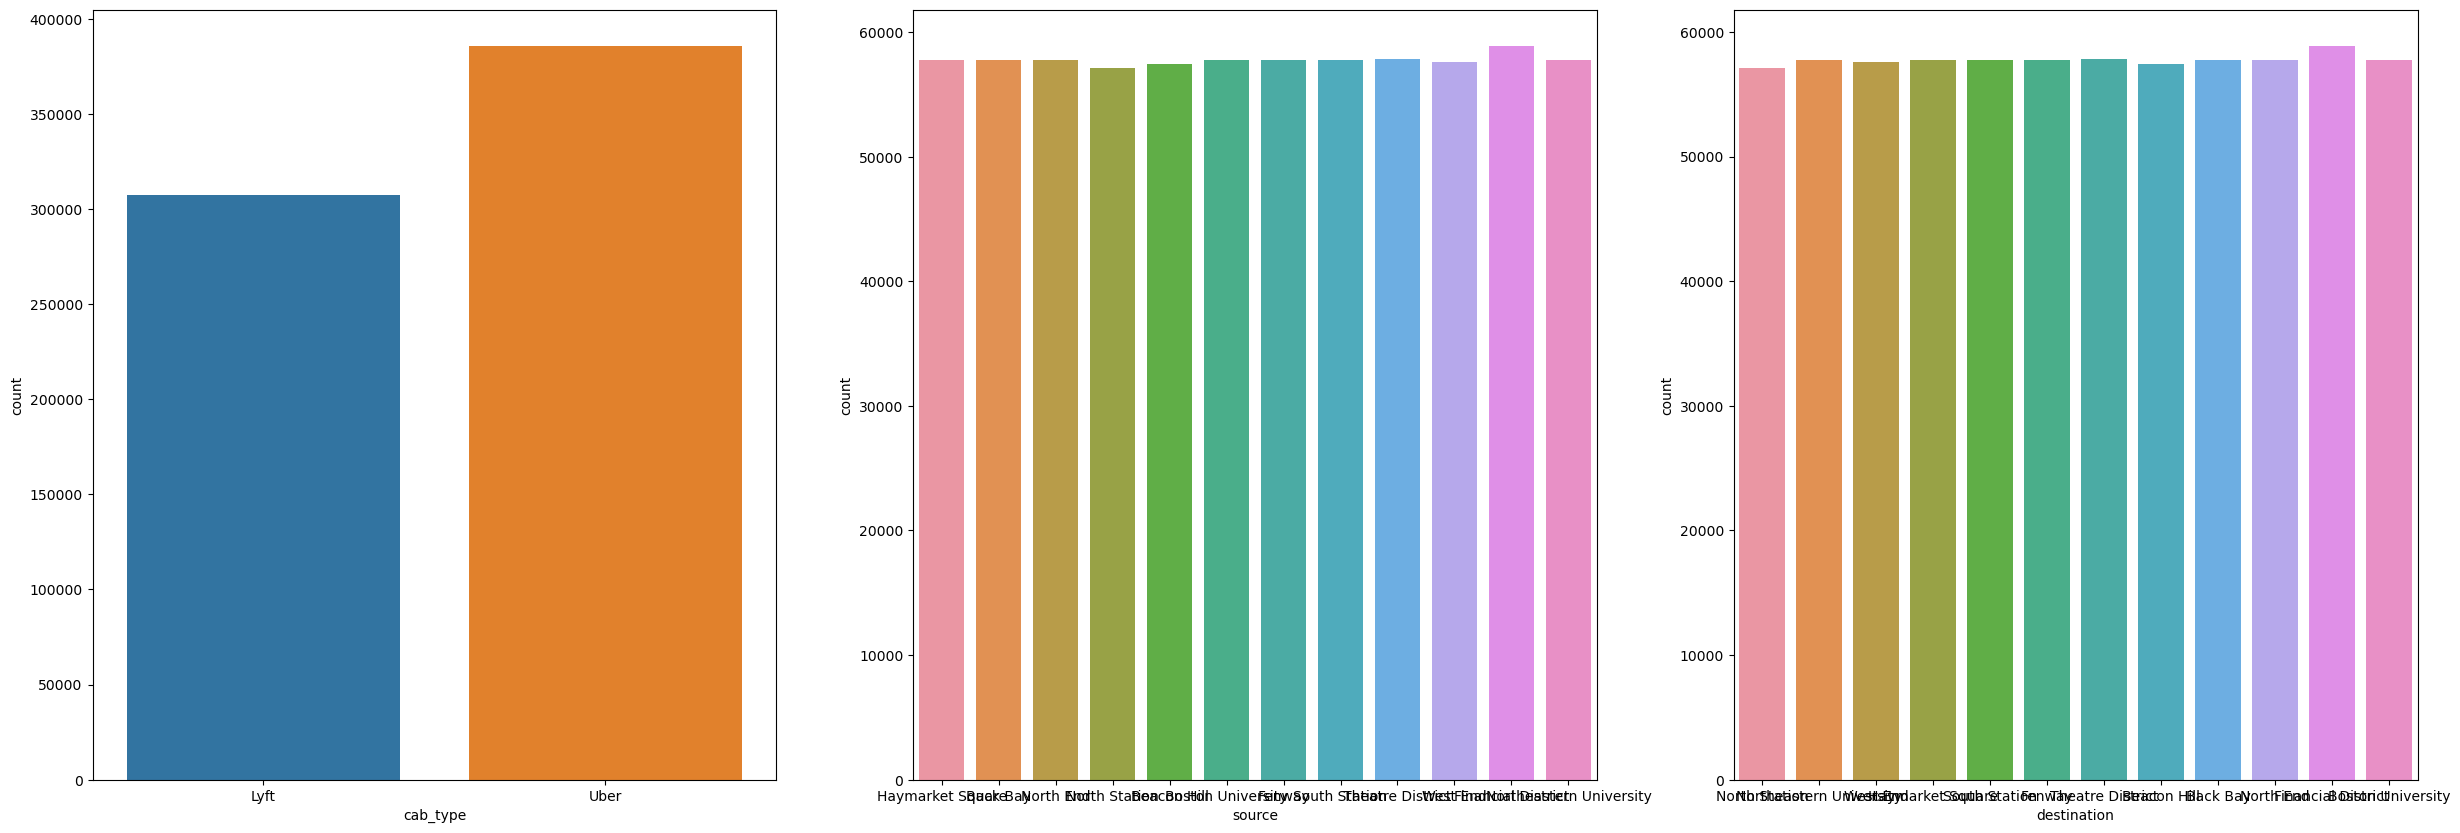

In [290]:
# Count plot untuk variabel kategorikal
categorical_cols = ['cab_type', 'source', 'destination']
plt.figure(figsize=(30, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(x=col, data=df)
plt.show()


-Cab type uber lebih banyak diminati daripada lyft

-Source cenderung stabil antara satu sama lain

-Destination cenderung stabil antara satu sama lain

#### Handling Missing Values

In [291]:
df = pd.read_csv("rideshare.csv")
missing_values = df.isnull().sum()
print(missing_values)


id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

## 5. Feature Engineering

#### Encoding

In [292]:
num_df = df.select_dtypes(exclude=['object'])

In [293]:
num_df.corr()['price'].sort_values(ascending=False)

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
latitude                       0.002088
visibility.1                   0.001497
visibility                     0.001497
windGust                       0.001218
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTime                     0.000760
sunriseTime                    0.000760
temperatureHighTime            0.000759
temperatureLowTime             0.000754
apparentTemperatureMaxTime     0.000746


In [294]:
from sklearn.preprocessing import LabelEncoder
# Mengambil kolom-kolom dengan tipe data kategorikal
data_kategorik = df.select_dtypes(include=['object'])

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom kategorikal
encoded_data = data_kategorik.apply(label_encoder.fit_transform)


#### Feature Selection

In [295]:
# Menggunakan fungsi .corr() dengan parameter method="kendall" untuk menghitung korelasi dengan metode Kendall
kendall_corr_matrix = encoded_data.join(df['price']).corr(method="kendall")


print(kendall_corr_matrix)


                     id  datetime  timezone    source  destination  cab_type  \
id             1.000000  0.000529       NaN -0.001202    -0.000074 -0.001565   
datetime       0.000529  1.000000       NaN  0.000358    -0.000691  0.000413   
timezone            NaN       NaN       1.0       NaN          NaN       NaN   
source        -0.001202  0.000358       NaN  1.000000    -0.005065  0.000775   
destination   -0.000074 -0.000691       NaN -0.005065     1.000000  0.000709   
cab_type      -0.001565  0.000413       NaN  0.000775     0.000709  1.000000   
product_id     0.001412 -0.000544       NaN -0.000566    -0.000519 -0.731313   
name          -0.000661  0.000852       NaN  0.000243     0.000223  0.313414   
short_summary -0.002012 -0.030008       NaN  0.000415    -0.002171 -0.000624   
long_summary   0.000109  0.000537       NaN -0.000661     0.000144  0.001633   
icon          -0.000667 -0.130185       NaN -0.002512    -0.003838  0.002046   
price          0.000314 -0.000031       

#### Define X dan Y

In [296]:
import pandas as pd

# Fitur dan variabel target
features = ['distance', 'surge_multiplier', 'product_id', 'cab_type']
target = ['price']

# Pisahkan fitur dan variabel target dari DataFrame
X = df[features]
Y = df[target]

# Lakukan one-hot encoding pada fitur-fitur yang memerlukan
X_encoded = pd.get_dummies(X)

# Gabungkan hasil encoding dengan variabel target
X_encoded_with_target = pd.concat([X_encoded,Y], axis=1)
X_encoded_with_target.reset_index(drop=True,inplace=True)
# Tampilkan DataFrame yang telah diencode
print(X_encoded_with_target)



        distance  surge_multiplier  \
0           0.44               1.0   
1           0.44               1.0   
2           0.44               1.0   
3           0.44               1.0   
4           0.44               1.0   
...          ...               ...   
693066      1.00               1.0   
693067      1.00               1.0   
693068      1.00               1.0   
693069      1.00               1.0   
693070      1.00               1.0   

        product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e  \
0                                                 False   
1                                                 False   
2                                                 False   
3                                                 False   
4                                                 False   
...                                                 ...   
693066                                            False   
693067                                             True   
693068      

#### Define Data Kategorik dan Data Numerik

In [299]:
# Membagi kolom berdasarkan tipe datanya
data_numerik = df[df.select_dtypes(exclude=['object']).columns.tolist()]
# Mencetak hasilnya
data_numerik

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.0330,42.34,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.0330,43.58,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.0330,38.33,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.0330,34.38,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.0330,37.44,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,13.0,1.00,1.0,42.3519,-71.0643,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,1.543708e+09,23,1,12,9.5,1.00,1.0,42.3519,-71.0643,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,1.543708e+09,23,1,12,NaN,1.00,1.0,42.3519,-71.0643,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,1.543708e+09,23,1,12,27.0,1.00,1.0,42.3519,-71.0643,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [300]:
# Membagi kolom berdasarkan tipe datanya
data_kategorik = df[df.select_dtypes(include=['object']).columns.tolist()]

# Mencetak hasilnya
data_kategorik

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night


Split Train dan Test

In [301]:
# Split data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded_with_target, Y, test_size=0.2, random_state=0)

# Output dimensi data latih dan data uji
print("Dimensi Data Latih (X_train):", X_train.shape)
print("Dimensi Data Uji (X_test):", X_test.shape)
print("Dimensi Target Data Latih (Y_train):", Y_train.shape)
print("Dimensi Target Data Uji (Y_test):", Y_test.shape)

Dimensi Data Latih (X_train): (554456, 18)
Dimensi Data Uji (X_test): (138615, 18)
Dimensi Target Data Latih (Y_train): (554456, 1)
Dimensi Target Data Uji (Y_test): (138615, 1)


Handling Outlier

In [302]:
# Handling outlier menggunakan IQR
def handle_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df.apply(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))
    return df

Handling Missing Values

In [334]:
# Menghandle missing values
X_train.fillna(0, inplace=True)
Y_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
Y_test.fillna(0, inplace=True)

Scaling

In [310]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Hitung mean dan standar deviasi dari setiap fitur dalam X_train
scaler.fit(X_train)
# Transformasi data latih dengan menggunakan mean dan standar deviasi yang telah dihitung
X_train_no_na = scaler.fit_transform(X_encoded_with_target)

X_train_no_na



array([[-1.5360209 , -0.15134887, -0.2938662 , ...,  1.1200732 ,
        -1.1200732 , -1.2381693 ],
       [-1.5360209 , -0.15134887, -0.2938662 , ...,  1.1200732 ,
        -1.1200732 , -0.5946929 ],
       [-1.5360209 , -0.15134887, -0.2938662 , ...,  1.1200732 ,
        -1.1200732 , -1.02367717],
       ...,
       [-1.04433399, -0.15134887, -0.2938662 , ..., -0.89279879,
         0.89279879,         nan],
       [-1.04433399, -0.15134887, -0.2938662 , ..., -0.89279879,
         0.89279879,  1.12124417],
       [-1.04433399, -0.15134887, -0.2938662 , ..., -0.89279879,
         0.89279879, -0.70193897]])

Handling Cardinality

In [311]:
# Untuk mengetahui cardinality dari setiap fitur di X_train
cardinality = X_encoded_with_target.nunique()

print("Cardinality of each feature:")
print(cardinality)

Cardinality of each feature:
distance                                           549
surge_multiplier                                     7
product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e      2
product_id_6c84fd89-3f11-4782-9b50-97c468b19529      2
product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546      2
product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969      2
product_id_8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a      2
product_id_997acbb5-e102-41e1-b155-9df7de0a73f2      2
product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d      2
product_id_lyft                                      2
product_id_lyft_line                                 2
product_id_lyft_lux                                  2
product_id_lyft_luxsuv                               2
product_id_lyft_plus                                 2
product_id_lyft_premier                              2
cab_type_Lyft                                        2
cab_type_Uber                                        2
price                               

## 6. Model Definition

In [339]:
model = LinearRegression()

## 7. Model Training

In [342]:
# Pelatihan model menggunakan data latih
model.fit(X_train, Y_train)

# Mendapatkan koefisien regresi
coefficients = model.coef_
intercept = model.intercept_

# Menampilkan koefisien regresi
print("Intercept:", intercept)
print("Coefficients:", coefficients)



Intercept: [1.11910481e-13]
Coefficients: [[ 1.39936307e-14 -7.93168209e-14 -2.01556995e-14  5.38649378e-14
   4.76396975e-14  2.27238309e-15 -1.11035531e-13 -2.75969111e-15
   2.05978123e-14 -1.86444299e-14  1.43624712e-14  7.50337485e-15
   6.74948772e-14 -3.29354643e-14 -2.82238373e-14  9.57911624e-15
  -9.56453372e-15  1.00000000e+00]]


## 8. Model Evaluation

In [343]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Model Evaluation on Y_Train:", y_pred_train)
print("Model Evaluation on Y_Test:", y_pred_test)


Model Evaluation on Y_Train: [[ 5. ]
 [19.5]
 [15. ]
 ...
 [18.5]
 [16.5]
 [10.5]]
Model Evaluation on Y_Test: [[11. ]
 [38.5]
 [10.5]
 ...
 [22.5]
 [ 7. ]
 [ 3.5]]


## 9. Model Saving

In [ ]:
from sklearn.linear_model import LinearRegression
mod_reg = LinearRegression()
mod_reg = mod_reg.fit(X_train.values,Y_train.values)

        price
165911   11.0
492218    9.0
458919   16.5
49823    27.5
628499    9.0
...       ...
390682   15.0
165407   10.5
128132   22.5
473323   16.5
331941    3.0

[510380 rows x 1 columns]


In [ ]:
import pickle
with open('model.pkl', 'wb') as f1:
    pickle.dump(mod_reg, f1)


## 10. Model Inference

In [ ]:
new_data = np.random.rand(1, 17)  

# Lakukan prediksi menggunakan model yang dimuat
predictions = mod_reg.predict(new_data)

# Tampilkan hasil prediksi
print("Hasil prediksi:", predictions)



Hasil prediksi: [[0.81295412]]


## 11. Pengambilan Kesimpulan

Model regresi yang telah dilatih memiliki kinerja yang sangat baik, dengan MSE mendekati nol dan R^2 score mencapai 1.0 pada kedua data latih dan data uji, menunjukkan bahwa model mampu melakukan prediksi yang sangat akurat terhadap nilai target. Selain itu, data menunjukkan variasi yang cukup besar dalam fitur-fitur yang digunakan untuk prediksi, yang mengindikasikan keragaman dalam dataset